# This is Tutorial for the Camera Calibration using OpenCV from link
'https://docs.opencv.org/3.4/dc/dbb/tutorial_py_calibration.html'

# Steps ;
  1. Build the DockerImage by running $sudo docker build ./ --tag  bfs-image-publisher
  
  1. Run the publisher code in conda environment using $python3 camerapublisher.py
  2. Run the Subscriber code in conda environment using $python3 camerasubscriber.py

In [1]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt
import yaml

In [2]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

#CHECKERBOARD = (6, 9)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# Defining the world coordinates for 3D points

objp = np.zeros((6*9,3), np.float32)
#objp = np.zeros((CHECKERBOARD[0] * CHECKERBOARD[1],3), np.float32)

objp[:,:2] = np.mgrid[0:6,0:9].T.reshape(-1,2)
#objp[:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

#images = glob.glob('../bfs-camera-driver/subscriber/data/img/*.png')
images = glob.glob('../bfs-camera-drive-not-git/subscriber/data/img/temp_img_data/*.png')
#images = glob.glob('../bfs-camera-drive-not-git/subscriber/data/img/old_pics/*.png')
print(images)

['../bfs-camera-drive-not-git/subscriber/data/img/temp_img_data/85789.png', '../bfs-camera-drive-not-git/subscriber/data/img/temp_img_data/98348.png', '../bfs-camera-drive-not-git/subscriber/data/img/temp_img_data/106205.png', '../bfs-camera-drive-not-git/subscriber/data/img/temp_img_data/163313.png', '../bfs-camera-drive-not-git/subscriber/data/img/temp_img_data/106808.png', '../bfs-camera-drive-not-git/subscriber/data/img/temp_img_data/118149.png', '../bfs-camera-drive-not-git/subscriber/data/img/temp_img_data/167619.png', '../bfs-camera-drive-not-git/subscriber/data/img/temp_img_data/128315.png', '../bfs-camera-drive-not-git/subscriber/data/img/temp_img_data/42049.png', '../bfs-camera-drive-not-git/subscriber/data/img/temp_img_data/88405.png', '../bfs-camera-drive-not-git/subscriber/data/img/temp_img_data/40604.png', '../bfs-camera-drive-not-git/subscriber/data/img/temp_img_data/64348.png', '../bfs-camera-drive-not-git/subscriber/data/img/temp_img_data/156811.png', '../bfs-camera-dr

In [3]:
# Extracting path of individual image stored in a given directory
for fname in images:
    img = cv.imread(fname)
    #img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)# TODO COLOR
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)# TODO COLOR
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (6,9), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (6,9), corners2, ret)
        
        #To display the features detected  in image
        #plt.imshow(img)
        #cv.imshow('img', img)
        #cv.waitKey(0)
#cv.destroyAllWindows()

In [4]:
"""
Performing camera calibration by passing the value of known 3D points (objpoints)
and corresponding pixel coordinates of the detected corners (imgpoints)
"""
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print(mtx)
print(dist)

[[1.00556816e+03 0.00000000e+00 7.19647363e+02]
 [0.00000000e+00 1.00396775e+03 5.39359732e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-0.17028557 -0.2262258   0.01016127 -0.00190288  0.17351702]]


In [5]:
# yaml code implementation
output = {'Matx' : mtx,
         'dist_coef': dist}
#with open(r'outputs.yaml', 'w') as file:
#    outputs = yaml.load(output, file)
#    print(outputs)

with open('../bfs-camera-driver/publisher/calibration.yaml') as fh:
    read_data = yaml.load(fh, Loader = yaml.FullLoader)
    matx = read_data['camera_matrix']
    dist_coeff = read_data['dist_coeff']
    #print(read_data)
    print('Camera Matrix ; ', matx)
    print('Distance Coefficients : ', dist_coeff)

Camera Matrix ;  [[1022.70705, 0.0, 719.37576], [0.0, 1021.43415, 539.79903], [0.0, 0.0, 1.0]]
Distance Coefficients :  [-0.25095, -0.1035, 0.007836, 0.007078, 0.115027]


In [6]:
#img = cv.imread('45544.png')
#img = cv.imread('111819.png')
img = cv.imread('464955.png')
#print(img.shape)
h, w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

print(newcameramtx)
#cv.getOptimalNewCameraMatrix(cameraMatrix, distortion Coefficient, imgSize, alpha=1, newImgSize(should be equal to imgSize))

[[762.02642822   0.         713.87312791]
 [  0.         775.66918945 560.64043385]
 [  0.           0.           1.        ]]


In [7]:
#Undistortion Method 1

[[-0.17028557 -0.2262258   0.01016127 -0.00190288  0.17351702]]
(1080, 1440, 3)


Text(0.5, 1.0, 'Calibrated Image')

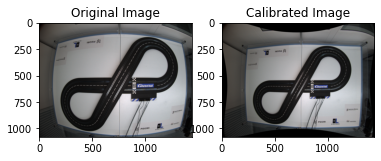

In [18]:
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
print(dist)
# crop the image
x, y, w, h = roi
#dst = dst[y:y+h, x:x+w]
dst1 = dst[y:y+h, x:x+w]
#print(dst)
print(dst.shape)
cv.imwrite('new_final13.png', dst1)
plt.subplot(121)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(122)
plt.imshow(dst)
plt.title('Calibrated Image')

In [9]:
#Undistortion Method 2

In [10]:
#mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w, h), 5)
mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w+x, h+y), 5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
print(dst.shape)
cv.imwrite('new_calibresult_final11.png', dst)

(905, 1341, 3)


True